<a href="https://colab.research.google.com/github/Chilkoti/Collab/blob/main/ArtLine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ArtLine**
**Create** **Amazing** **Line** **Art**.

In [1]:
!git clone https://github.com/vijishmadhavan/ArtLine.git ArtLine

Cloning into 'ArtLine'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 411 (delta 0), reused 0 (delta 0), pack-reused 408
Receiving objects: 100% (411/411), 343.40 KiB | 20.20 MiB/s, done.
Resolving deltas: 100% (205/205), done.


In [2]:
cd ArtLine

/content/ArtLine


In [3]:
!pip install -r colab_requirements.txt

     |████████████████████████████████| 20.4MB 66.8MB/s 
     |████████████████████████████████| 10.5MB 34.3MB/s 
     |████████████████████████████████| 748.8MB 23kB/s 
     |████████████████████████████████| 5.9MB 41.1MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101


# **Runtime**

* Hardware Accelerator = GPU 


In [1]:
import fastai
from fastai.vision import *
from fastai.utils.mem import *
from fastai.vision import open_image, load_learner, image, torch
import numpy as np
import urllib.request
import PIL.Image
from io import BytesIO
import torchvision.transforms as T
from PIL import Image
import requests
from io import BytesIO
import fastai
from fastai.vision import *
from fastai.utils.mem import *
from fastai.vision import open_image, load_learner, image, torch
import numpy as np
import urllib.request
import PIL.Image
from io import BytesIO
import torchvision.transforms as T



In [2]:
class FeatureLoss(nn.Module):
    def __init__(self, m_feat, layer_ids, layer_wgts):
        super().__init__()
        self.m_feat = m_feat
        self.loss_features = [self.m_feat[i] for i in layer_ids]
        self.hooks = hook_outputs(self.loss_features, detach=False)
        self.wgts = layer_wgts
        self.metric_names = ['pixel',] + [f'feat_{i}' for i in range(len(layer_ids))
              ] + [f'gram_{i}' for i in range(len(layer_ids))]

    def make_features(self, x, clone=False):
        self.m_feat(x)
        return [(o.clone() if clone else o) for o in self.hooks.stored]
    
    def forward(self, input, target):
        out_feat = self.make_features(target, clone=True)
        in_feat = self.make_features(input)
        self.feat_losses = [base_loss(input,target)]
        self.feat_losses += [base_loss(f_in, f_out)*w
                             for f_in, f_out, w in zip(in_feat, out_feat, self.wgts)]
        self.feat_losses += [base_loss(gram_matrix(f_in), gram_matrix(f_out))*w**2 * 5e3
                             for f_in, f_out, w in zip(in_feat, out_feat, self.wgts)]
        self.metrics = dict(zip(self.metric_names, self.feat_losses))
        return sum(self.feat_losses)
    
    def __del__(self): self.hooks.remove()

In [3]:
MODEL_URL = "https://www.dropbox.com/s/p9lynpwygjmeed2/ArtLine_500.pkl?dl=1 "
urllib.request.urlretrieve(MODEL_URL, "ArtLine_500.pkl")
path = Path(".")
learn=load_learner(path, 'ArtLine_500.pkl')

# **URL**
Type in a url to a direct link of an **high quality image**. Usually that means they'll end in .png, .jpg, etc. 

**Note** : Works well with **portrait photos having good lighting and plain background**. But you're free to explore.

Link to high-quality portrait pics. Click on the image, let it expand and then copy image address.

https://www.freepik.com/search?dates=any&format=search&from_query=Portrait&page=1&query=Portrait&sort=popular&type=photo

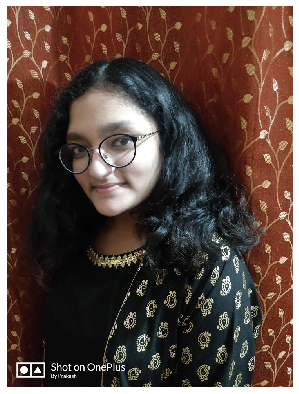

In [15]:
url = 'https://lh3.googleusercontent.com/pr_SPDmkokj0ED6_f7NNPvjOWjQRSdrS0Qqk8b_w-bgEbqzaxchVOhB5FxYaq85xXrxZxUuBMwYmlnyKA7MMoF97LIoV7SBi85PNx0ov6B5pkeIe4-dLzotqFCsE_0JINBZX26fT7Xxc7pp8OmZA1I_UsEkwKGz05Yy9FKOuwuS3aCdkYlbDGNblTsPT1HDA-qSEl9xWkYP9HzdCGjZMSvqqmmcVnTMpi6f0Pxkm80f7epA0U_sgnN49xGExV7PnRHvhrgbR3ObU2S_dQPXn00ig3Js7anQb3KLl3-t1AbK4G7kiEJhJGR3TGuBzOqGriizXhUOdejuqOSkkN4L3sLo_QQh30wN4FXJsNJ0DD16n72UEOTTrnd720BYLaC8grsopcijuHwZGlDc-Aak2b4MOPU1pNLV7N4zGfjBUFfLEDWxak88dttqQAQ_I-YeebUsZee9WmcHKc1Cq2KkQAopLF912ZA_LD9oAV7fA5JFeofrr5M4gzabYdmSFyS7kfwlh8H4ZK4CbGMTkoZOs-JrB9nu-YdGBjerYPK1CgDHQRljV8XJl8RRZT_VGOP1vB7Q__IGE14vIKB263xh6QkBwyqRY3cCrGveSaRywaRv_wvtuM-b2jl5bFKqe0yDZBjrqpV2TJ97WZcKogI84bMLqDOxUmcmAYJ681FU8vqY2X4ukyQ0Li7fXl5eX44E=w730-h973-no?authuser=1' #@param {type:"string"}

response = requests.get(url)
img = PIL.Image.open(BytesIO(response.content)).convert("RGB")
img_t = T.ToTensor()(img)
img_fast = Image(img_t)
show_image(img_fast, figsize=(7,7), interpolation='nearest');


# **Output**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


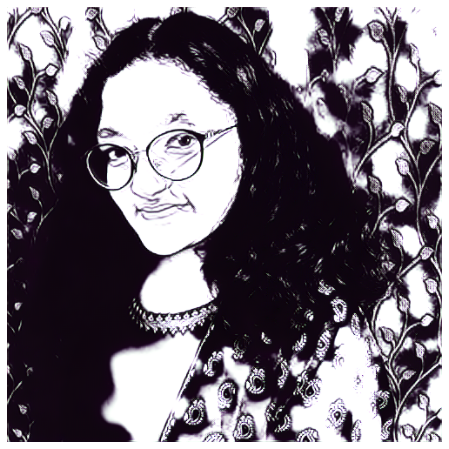

In [16]:
p,img_hr,b = learn.predict(img_fast)
Image(img_hr).show(figsize=(8,8))


# **Recommended image sources**

https://www.freepik.com/search?dates=any&format=search&from_query=Portrait&page=1&query=Portrait&sort=popular&type=photo

https://www.pexels.com/search/portrait%20man/

https://www.flickr.com/search/?user_id=37277626%40N07&sort=date-taken-desc&safe_search=1&view_all=1&tags=portrait



